# 模型选择、欠拟合和过拟合

前面学习的基于 `Fashion-Mnist` 数据集的实验中，我们评价了机器学习模型在训练数据集和测试集上的表现。但是当训练数据集更准确时，在测试集上却不一定更准确。

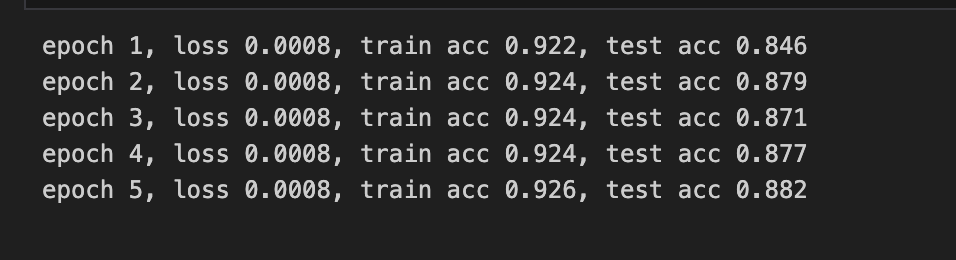

## 训练误差与泛化误差

在解释上述现象之前，我们需要区分训练误差（training error）和泛化误差（generalizationerror）。通俗来讲，前者指模型在训练数据集上表现出的误差，后者指模型在任意⼀个测试数据样本上表现出的误差的期望，并常常通过测试数据集上的误差来近似。计算训练误差和泛化误差可以使⽤之前介绍过的损失函数，例如线性回归⽤到的平⽅损失函数和softmax回归⽤到的交叉熵损失函数。

⼀般情况下，由训练数据集学到的模型参数会使模型在训练数据集上的表现优于或等于在测试数据集上的表现。由于⽆法从训练误差估计泛化误差，⼀味地降低训练误差并不意味着泛化误差⼀定会降低。

## 模型的选择

在机器学习中，通常需要评估若干候选模型的表现并从中选择模型。这一过程称为模型选择。可供选择的候选模型可以是有着不同超参数的同类模型。以多层感知机为例，我们可以选择隐藏层的个数，以及每个隐藏层中隐藏单元个数和激活函数。为了得到有效的模型，我们通常要在模型选择上下一番功夫。下面我们来描述模型选择中通常书用的验证数据集

从严格意义上讲，测试集只能在所有超参数和模型参数选定后使⽤⼀次。不可以使⽤测试数据选择模型，如调参。由于⽆法从训练误差估计泛化误差，因此也不应只依赖训练数据选择模型。鉴于此，我们可以预留⼀部分在训练数据集和测试数据集以外的数据来进⾏模型选择。这部分数据被称为验证数据集，简称验证集（validation set）。例如，我们可以从给定的训练集中随机选取⼀⼩部分作为验证集，⽽将剩余部分作为真正的训练集。

然⽽在实际应⽤中，由于数据不容易获取，测试数据极少只使⽤⼀次就丢弃。因此，实践中验证数据集和测试数据集的界限可能⽐较模糊。从严格意义上讲，除⾮明确说明，否则本书中实验所使⽤的测试集应为验证集，实验报告的测试结果（如测试准确率）应为验证结果（如验证准确率）。

## K折交叉验证

由于验证数据集不参与模型训练，当训练数据不够用时，预留大量的验证数据显得太奢侈。一种改善的方法是K折交叉验证。在K折交叉验证中，我们把原始训练数据集分割成K个不重合的子数据集，然后我们做K此模型训练和验证。每一次，我们使用一个自数据集验证模型，并使用其他K-1个子数据集来训练模型。在这K次训练和验证中，每次用来验证模型的字数据集都不同。最后，我们对这K次训练误差和验证误差分别求平均

## 欠拟合和过拟合

接下来，我们来探究模型训练中经常出现的两类经典问题：
1. **模型无法得到较低的训练误差**。我们称这种现象为欠拟合
2. **模型的训练误差远小于它在测试数据集上的误差**。我们称该现象为过拟合。

在实践中，我们要尽可能同时应对过拟合和欠拟合。虽然有很多因素可能导致这两种拟合问题，在这里重点讨论两个因素：模型复杂度和训练数据集大小。

**模型复杂度**：为了解释模型复杂度，我们以多项式函数拟合为例。给定一个有标量数据特征 $x$ 和对应的标量标签 $y$ 组成的训练数据集，多项式函数拟合的目标是找一个K阶多项式函数。

$$
\hat{y} = b + \sum_{k=1}^K x^k w_k
$$

来近似 $y$。在上式中，$w_k$ 是模型的权重参数，$b$ 为偏差参数。与线性回归相同，多项式函数拟合也使用平方损失函数。特别地，一阶多项式函数拟合又叫线性函数拟合。

因为高阶多项式函数拟合参数更多，模型函数的选择空间更大，所以高阶多项式函数比低阶多项式函数的复杂度更高。因此高阶多项式函数比低阶多项式函数更容易在相同的训练数据集上得到更低的训练误差。给定训练数据集，模型的复杂度和误差之间的关系通常如图所示。

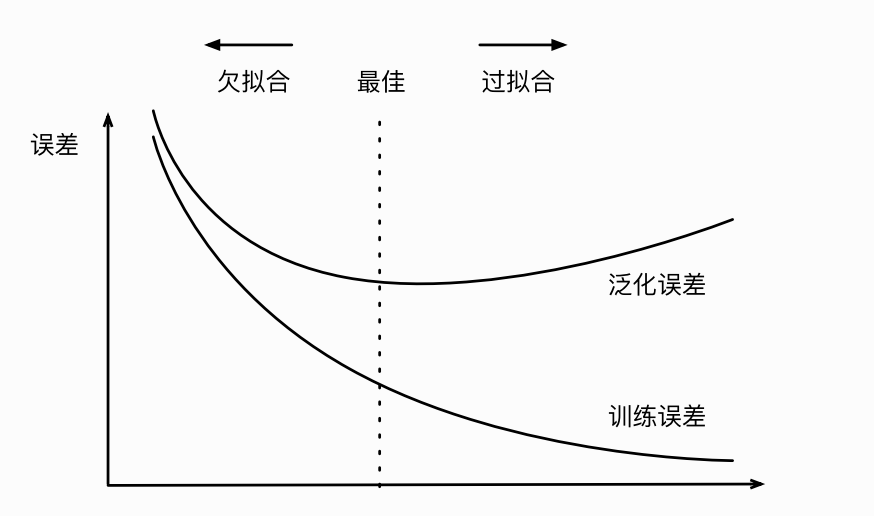

给定训练数据集，如果模型的复杂度过低，很容易出现⽋拟合；如果模型复杂度过⾼，很容易出现过拟合。应对⽋拟合和过拟合的⼀个办法是针对数据集选择合适复杂度的模型。

影响欠拟合和过拟合的另一个重要因素是训练数据集的大小。一般来说，如果训练数据集中样本数过少，特别是比模型参数数量更少时，过拟合更容易发生。此外，泛化误差不会随着训练数据集里样本数量增加而增大。因此，我们通常希望训练数据集大一些，特别是在模型复杂度较高时，例如层数较多的深度学习模型。

接下来看一个多项式函数拟合的例子。

In [68]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pylab as plt

In [97]:
# 生成数据集
n_train,n_test,true_w,true_b = 100,100,[1.2,-3.4,5.6],5
features = torch.randn((n_train+n_test,1)) #内层括号定义形状元组，外层括号是函数调用的语法，两者结合是为了清晰地向 torch.randn 传递张量的形状信息。（为什么要两个括号）
poly_features = torch.cat((features,torch.pow(features,2),torch.pow(features,3)),1) # .pow()乘方函数 每行1个。torch.cat() 拼接
labels = (true_w[0] * poly_features[:, 0] + true_w[1] *poly_features[:, 1] + true_w[2] * poly_features[:, 2] + true_b)
labels +=torch.tensor(np.random.normal(0,0.01,size = labels.size()),dtype=torch.float)

In [98]:
features[:2], poly_features[:2], labels[:2]

(tensor([[0.7243],
         [0.7159]]),
 tensor([[0.7243, 0.5246, 0.3799],
         [0.7159, 0.5125, 0.3669]]),
 tensor([6.2209, 6.1601]))

In [99]:
# 训练模型

def semilogy(x_vals,y_vals,x_label,y_label,x2_vals =None,y2_vals =None,legend = None,figsize=(3.5,2.5)):
    plt.figure(figsize=figsize)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals,y_vals) #核心特点：x 轴使用线性刻度，y 轴使用对数刻度。
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals,y2_vals,linestyle=':')
        plt.legend(legend)


In [100]:
num_epochs,loss = 100,torch.nn.MSELoss()


In [91]:
import torch.utils

和线性回归⼀样，多项式函数拟合也使⽤平⽅损失函数。

因为我们将尝试使⽤不同复杂度的模型来拟合⽣成的数据集，所以我们把模型定义部分放在 `fit_and_plot` 函数中。

In [92]:
def fit_and_plot(train_features, test_features, train_labels, test_labels): # 这里的features 是样本，不是权重
    net = torch.nn.Linear(train_features.shape[-1], 1)
    batch_size = min(10, train_labels.shape[0]) 
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
        
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data, '\nbias:', net.bias.data)

final epoch: train loss 0.00010791697422973812 test loss 0.00016105937538668513
weight: tensor([[ 1.1971, -3.3999,  5.6016]]) 
bias: tensor([5.0011])


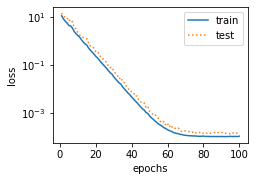

In [93]:
fit_and_plot(poly_features[:n_train,:],poly_features[n_train:,:],labels[:n_train],labels[n_train:])

## 线性函数拟合（欠拟合）

我们试试线性函数拟合。

final epoch: train loss 211.6986541748047 test loss 276.2333679199219
weight: tensor([[19.2096]]) 
bias: tensor([-2.4223])


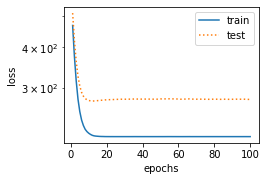

In [94]:
fit_and_plot(features[:n_train,:],features[n_train:,:],labels[:n_train],labels[n_train:])

## 训练样本不足（过拟合）

即使使用与数据生成模型同阶的三阶多项式函数模型，如果训练样本不足，容易过拟合。让我们只使用两个样本来训练模型。

final epoch: train loss 0.017521794885396957 test loss 572.6619262695312
weight: tensor([[2.0470, 2.2992, 0.8061]]) 
bias: tensor([3.0911])


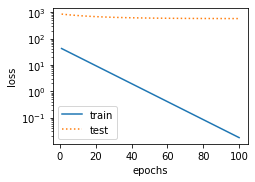

In [101]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :],labels[0:2],labels[n_train:])

## 小结

由于无法从训练误差估计泛化误差，一味地降低训练误差并不意味着泛化误差一定会降低。机器学习模型应该关注降低泛化误差

可以使用验证数据集来进行模型选择

欠拟合指模型无法得到较低的训练误差，过拟合指模型的训练误差远小于它在测试数据集上的误差

应选择复杂度合适的模型并避免使用过少的训练样本。